<a href="https://colab.research.google.com/github/alethat/MachineLearningTasks/blob/main/TaskWeek3/TaskWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Aletha Tanisha

NPM: 2106722770

# **Import Libraries**

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# **1. Tensors**
Everything in PyTorch is based on Tensor operations. A Tensor is a multi-dimensional matrix containing elements of a single data type.

In [3]:
# torch.empty(size): uninitiallized
x = torch.empty(1) # scalar
print('empty(1):', x)

x = torch.empty(3) # vector
print('empty(3):', x)

x = torch.empty(2, 3) # matrix
print('empty(2, 3):', x)

x = torch.empty(2, 2, 3) # tensor, 3 dimensions
# x = torch.empty(2, 2, 2, 3) # tensor, 4 dimensions
print('empty(2, 2, 3):', x)

# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print('rand(5, 3):', x)

# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print('zeros(5, 3):', x)

empty(1): tensor([9.9468e-28])
empty(3): tensor([ 2.5028e-26,  4.5857e-41, -1.8038e+32])
empty(2, 3): tensor([[ 2.5028e-26,  4.5857e-41, -1.2542e+32],
        [ 3.3453e-41,  1.0903e-06,  4.5856e-41]])
empty(2, 2, 3): tensor([[[2.6198e-32, 2.6201e-32, 2.5355e-38],
         [6.5485e-33, 2.4619e-38, 2.4245e-38]],

        [[2.5715e-38, 2.4245e-38, 6.6292e-36],
         [2.4247e-38, 1.7168e-27, 9.9957e-38]]])
rand(5, 3): tensor([[0.7321, 0.7938, 0.5537],
        [0.3650, 0.2660, 0.5987],
        [0.7817, 0.9770, 0.9260],
        [0.3616, 0.7416, 0.6965],
        [0.0783, 0.4897, 0.4463]])
zeros(5, 3): tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [4]:
# check size
print('size', x.size()) # x.size(0)
print('shape', x.shape) # x.shape[0]

size torch.Size([5, 3])
shape torch.Size([5, 3])


In [5]:
# check data type
print(x.dtype)

# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [6]:
# construct from data
x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


In [7]:
# requires_grad argument
# this will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize

x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


## **Operations with Tensors**

In [8]:
# operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x, y)

# in place addition, everything with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x)

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.8518, 0.4429],
        [0.0372, 0.6801]])
tensor([[1.8518, 1.4429],
        [1.0372, 1.6801]])


In [9]:
# subtraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x, y)

# division
z = x / y
z = torch.div(x, y)

In [10]:
# slicing
x = torch.rand(5, 3)
print(x)
print('x[:, 0]', x[:, 0]) # all rows, column 0
print('x[1, :]', x[1, :]) # row 1, all columns
print('x[1, 1]', x[1, 1]) # element at 1, 1

# get the actual value if only 1 element in your tensor
print('x[1, 1].item()', x[1, 1].item())

tensor([[0.2269, 0.4921, 0.4010],
        [0.9693, 0.0419, 0.3830],
        [0.7336, 0.8067, 0.4124],
        [0.9407, 0.4763, 0.6283],
        [0.2043, 0.1002, 0.8522]])
x[:, 0] tensor([0.2269, 0.9693, 0.7336, 0.9407, 0.2043])
x[1, :] tensor([0.9693, 0.0419, 0.3830])
x[1, 1] tensor(0.0419)
x[1, 1].item() 0.04188573360443115


In [11]:
# reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## **NumPy**
Converting a Torch Tensor to a NumPy array and vice versa is very easy

In [12]:
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [13]:
# careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [14]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
print(a)
print(b)
print(c)

# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## **GPU Support**
By default all tensors are created on the CPU. But we can also move them to the GPU (if it's available) or create them directly on the GPU.

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2, 2).to(device) # move tensors to GPU device
# x = x.to('cpu')
# x = x.to('cuda')

x = torch.rand(2, 2, device=device) # or directly create them on GPU

# **2. Autograd**
The autograd package provides automatic differentiation for all operations on Tensors. Generally speaking, ***torch.autograd*** is an engine for computing the vector-Jacobian product. It computes partial derivatives while applying the chain rule.

Set **`requires_grad=True`**

In [16]:
# requires_grad=True -> tracks all operations on the tensor
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([-0.6273, -2.0155, -2.1863], requires_grad=True)
tensor([ 1.3727, -0.0155, -0.1863], grad_fn=<AddBackward0>)


In [17]:
# do more operations on y
z = y * y * 3
print(z)

z = z.mean()
print(z)

tensor([5.6532e+00, 7.2200e-04, 1.0414e-01], grad_fn=<MulBackward0>)
tensor(1.9194, grad_fn=<MeanBackward0>)


In [18]:
# let's compute the gradients with backpropagation
# when we finish our computation we can call. backward() and have all the gradients compute automatically
# the gradient for this tensor will be accumulated into .grad attribute
# it is the partial derivate of the function w.r.t. the tensor

print(x.grad)
z.backward()
print(x.grad) # dz/dx

# careful backward() accumulates the gradient for this tensor into .grad attribute
# we need to be careful during optimization optimizer.zero_grad()

None
tensor([ 2.7455, -0.0310, -0.3726])


## **Stop a tensor from tracking history**
For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:

*   **`x.requires_grad_(False)`**
*   **`x.detach()`**
*   wrap in **`with torch.no_grad()`**




In [19]:
# .requires_grad_(...) changes an existing flag in-place
a = torch.randn(2, 2)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [20]:
# .detach() get a new Tensor with the same content but no gradient computation
a = torch.randn(2, 2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [21]:
# wrap in 'with torch.no_grad()'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
  b = a ** 2
  print(b.requires_grad)

True
False


## **Gradient Descent Autograd**
Linear Regression example:

$f(x) = w * x + b$

here : **`f(x) = 2 * x`**

In [22]:
# linear regression
# f = w * x * b
# here : f = 2 * x

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y) ** 2).mean()

X_test = 5.0

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


In [23]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
  # predict = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # calculate gradients = backward pass
  l.backward()

  # update weights
  # w.data = w.data - learning_rate * w_grad
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero the gradients after updating
  w.grad.zero_()

  if (epoch + 1) % 10 == 0:
    print(f'epoch {epoch + 1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) =  {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) =  10.000


# **3. Model, Loss, and Optimizer**
A typical PyTorch pipeline looks like this:
1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights





In [24]:
# linear regression
# f = w * x
# here : f = 2 * x

# training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

# create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 8, n_features = 1


In [25]:
# design model, the model has to implement the forward pass!

# here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define different layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) - {model(X_test).item():.3f}')

# define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
for epoch in range(n_epochs):
  # predict = forward pass with our model
  y_predicted = model(X)

  # loss
  l = loss(Y, y_predicted)

  # calculate gradients = backward pass
  l.backward()

  # update weights
  optimizer.step()

  # zero the gradients after updating
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    w, b = model.parameters() # unpack parameters
    print('epoch ', epoch + 1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction after training f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) - 4.254
epoch  10 : w =  1.9426147937774658  loss =  0.021179189905524254
epoch  20 : w =  1.9454790353775024  loss =  0.019505182281136513
epoch  30 : w =  1.9476172924041748  loss =  0.01800542138516903
epoch  40 : w =  1.9496713876724243  loss =  0.01662101037800312
epoch  50 : w =  1.951645016670227  loss =  0.015342977829277515
epoch  60 : w =  1.9535411596298218  loss =  0.0141633041203022
epoch  70 : w =  1.9553629159927368  loss =  0.013074259273707867
epoch  80 : w =  1.9571133852005005  loss =  0.012069014832377434
epoch  90 : w =  1.9587950706481934  loss =  0.011141009628772736
epoch  100 : w =  1.9604108333587646  loss =  0.010284380987286568
Prediction after training f(5.0) = 10.025


# **4. First Neural Net**
GPU, Datasets, DataLoader, Transforms, Neural Net, Training and Evaluation

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11748703.07it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 344799.62it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 685794.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5614656.28it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



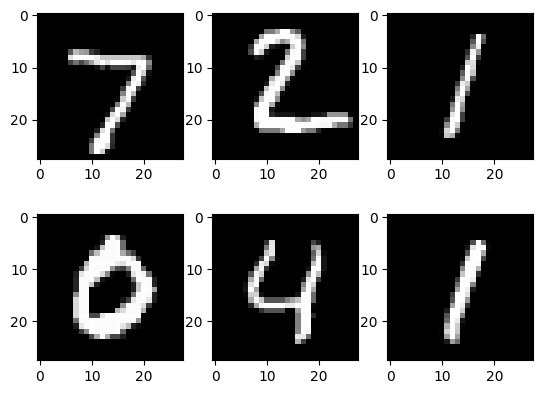

In [26]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper-parameters
input_size = 784 # 28 x 28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [27]:
# fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.ll = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.ll(x)
    out = self.relu(out)
    out = self.l2(out)
    # no activation and no softmax at the end
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [100, 1, 28, 28]
    # resized: [100, 784]
    images = images.reshape(-1, 28 * 28).to(device)
    labels = labels.to(device)

    # forward pass and loss calculation
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward and optimize
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i + 1) % 100 == 0:
      print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4431
Epoch [1/2], Step [200/600], Loss: 0.2865
Epoch [1/2], Step [300/600], Loss: 0.3645
Epoch [1/2], Step [400/600], Loss: 0.1701
Epoch [1/2], Step [500/600], Loss: 0.2762
Epoch [1/2], Step [600/600], Loss: 0.0924
Epoch [2/2], Step [100/600], Loss: 0.1637
Epoch [2/2], Step [200/600], Loss: 0.1871
Epoch [2/2], Step [300/600], Loss: 0.1892
Epoch [2/2], Step [400/600], Loss: 0.0283
Epoch [2/2], Step [500/600], Loss: 0.1548
Epoch [2/2], Step [600/600], Loss: 0.1395


In [31]:
# test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.reshape(-1, 28 * 28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value, index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100 * acc} %')

Accuracy of the network on the 10000 test images: 97.08 %


# **5. CNN**
This section covers:
* Convolutional Layers
* MaxPooling
* Save/Load Model

Files already downloaded and verified
Files already downloaded and verified


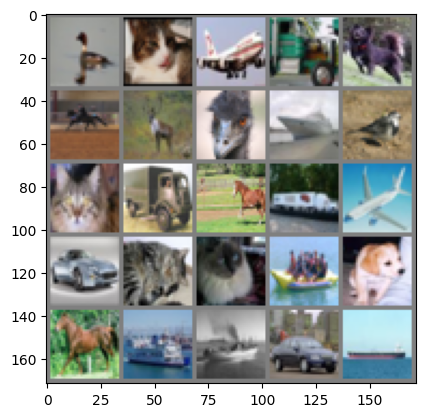

In [37]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]
# we transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                              train=True,
                                              download=True,
                                              transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                             train=False,
                                             download=True,
                                             transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
  imgs = imgs / 2 + 0.5 # normalize
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs, (1, 2, 0)))
  plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)


In [38]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.fc1 = nn.Linear(64 * 4 * 4, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    # N, 3, 32, 32
    x = F.relu(self.conv1(x)) # -> N, 32, 30, 30
    x = self.pool(x)          # -> N, 32, 15, 15
    x = F.relu(self.conv2(x)) # -> N, 64, 13, 13
    x = self.pool(x)          # -> N, 64, 6, 6
    x = F.relu(self.conv3(x)) # -> N, 64, 4, 4
    x = torch.flatten(x, 1)   # -> N, 1024
    x = F.relu(self.fc1(x))   # -> N, 64
    x = self.fc2(x)           # -> N, 10
    return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):

  running_loss = 0.0

  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward and optimize
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()

  print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

[1] loss: 1.488
[2] loss: 1.122
[3] loss: 0.956
[4] loss: 0.851
[5] loss: 0.777
[6] loss: 0.712
[7] loss: 0.662
[8] loss: 0.618
[9] loss: 0.577
[10] loss: 0.544
Finished Training


In [41]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
  n_correct = 0
  n_correct2 = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    # max returns (value, index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

    outputs2 = loaded_model(images)
    _, predicted2 = torch.max(outputs2, 1)
    n_correct2 += (predicted2 == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the model: {acc} %')

  acc = 100.0 * n_correct2 / n_samples
  print(f'Accuracy of the loaded model: {acc} %')

<ipython-input-41-a4e83cc57fc5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the pat

Accuracy of the model: 72.04 %
Accuracy of the loaded model: 72.04 %
